# Filtragem no domínio espacial

A convolução discreta é uma ferramenta para construir qualquer filtro linear ou de deslocamento. A equação da convolução, g(x), da sequência f(x) com o nucleo da convolução h(x) é:

In [12]:
from IPython.display import Image
from IPython.display import display
display(Image(url='../data/convrect.gif'))

## Filtro suavizante

Filtros suavizantes são aqueles que removem a nitidez da imagem fazendo uma média, aritmética ou ponderada, na janela do núcleo. O filtro ponderado suavizante mais comum é o da gaussiana. Filtros suavizantes são muito utilizados para eliminar ruído de uma imagem.
Filtro da Média

### Filtro da média

O filtro da média é composto por uma máscara quadrada com pesos iguais. Os pesos são divididos pelo número de elementos da máscara, para não alterar a intensidade da imagem. Para realizar a operação de filtragem, depois de criarmos a máscara, utilizamos a função função iaconv da toolbox, que faz a varredura da imagem pelo filtro.

kernel=
 [[ 0.11111111  0.11111111  0.11111111]
 [ 0.11111111  0.11111111  0.11111111]
 [ 0.11111111  0.11111111  0.11111111]]


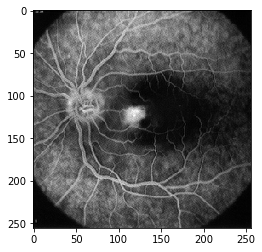

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import sys,os
ia898path = os.path.abspath('../../')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

f = mpimg.imread('../data/retina.tif')
s = 3
k = np.ones((s,s))/(s*s)
print('kernel=\n',k)

fconv = ia.conv(f,k)
plt.imshow(f, cmap='gray')

### Filtro Gaussiano

Assim como o filtro da média, o filtro gaussiano é composto por uma máscara quadrada, onde os elementos são pesos de uma gaussiana bidimensional. Para que o filtro gaussiano não altere a intensidade da imagem, divide-se a máscara gaussiana pelo somatória de todos os elementos da máscara.

g1= [[ 0.093  0.119  0.093]
 [ 0.119  0.153  0.119]
 [ 0.093  0.119  0.093]]


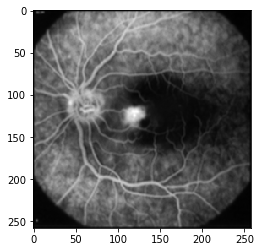

In [2]:
g1 = ia.gaussian((3,3), np.transpose([[1,1]]), [[2,0],[0,2]])
g1 = g1/g1.sum() # normalização
print('g1=', g1.round(3))
G = ia.conv(f,g1)
plt.imshow(f,cmap='gray')
plt.imshow(G,cmap='gray')
fgauss = G[1:-1,1:-1] # tratamento de borda
